In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from decision_tree import Tree
from datasets import *
from fitness import *
from ls import ls_first_improvement
from visual_utils import *
from perturbs import *
from ea import *
from crossovers import *

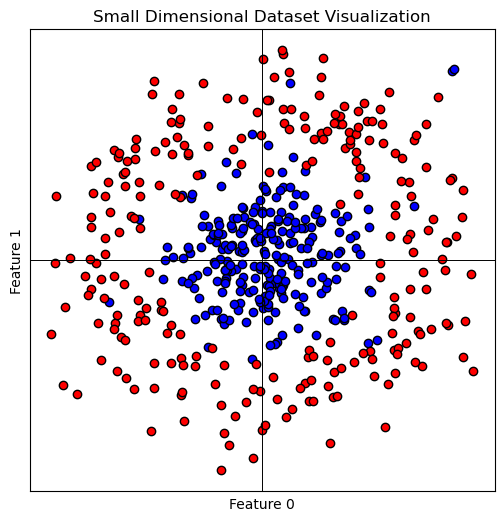

dataset keys: dict_keys(['data', 'labels', 'feature_bounds'])
Number of data: 500


In [2]:
dataset_dict = generate_small_dataset()
visualize_small_dataset(dataset_dict["data"], dataset_dict["labels"])

#usual fitness with whole dataset
fitness_normal = lambda tree: fitness(tree, dataset_dict)

#alternative fitness
fitness_class = BaggingFitness(dataset_dict)
fitness_bagging = lambda tree: bagging_fitness(tree,fitness_class)  

#test fitness
alt_dataset_dict = generate_small_dataset(n_samples=2000, random_seed=1101)
fitness_test = lambda tree: fitness(tree, alt_dataset_dict)

In [ ]:
perturbation = lambda tree: combined_perturb(
    tree,
    feature_bounds=dataset_dict["feature_bounds"],
    prob_value=0.05,  # change value by a small step
    prob_add=0.06,  # expand leaf
    prob_prune=0.01,  # prune somewhere
)

fitness_fn = fitness_bagging

init_fn = "clever"

max_evals = 10_000
trials = 50

fitness_list = []
alt_fitness_list = []
sizes = []
for trial in range(trials):

    results = ls_first_improvement(
        fitness_fn=fitness_fn,
        perturbation_fn=perturbation,
        initialisation_fn=init_fn,
        stop_cond=max_evals,
        one_step_max=500,
        p_add=0.7,
        max_depth=3,
        feature_bounds=dataset_dict["feature_bounds"],
    )

    history = results["history"]
    all_solutions = [it["solution"] for it in history]
    normal_fitness_values = [fitness_normal(tree) for tree in all_solutions]
    index = np.argmax(normal_fitness_values)
    best_tree = history[index]["solution"]

    sizes.append(best_tree.size())
    fitness_list.append(fitness_normal(best_tree))
    alt_fitness_list.append(fitness_test(best_tree))

fitness_list = np.array(fitness_list)
sizes = np.array(sizes)

print("fitness: ")
print(np.mean(fitness_list), np.std(fitness_list))
print(fitness_list)

print("\ntest fitness:")
print(np.mean(alt_fitness_list), np.std(alt_fitness_list))
print(alt_fitness_list)

print("\nsizes: ")
print(np.mean(sizes), np.std(sizes))
print(sizes)

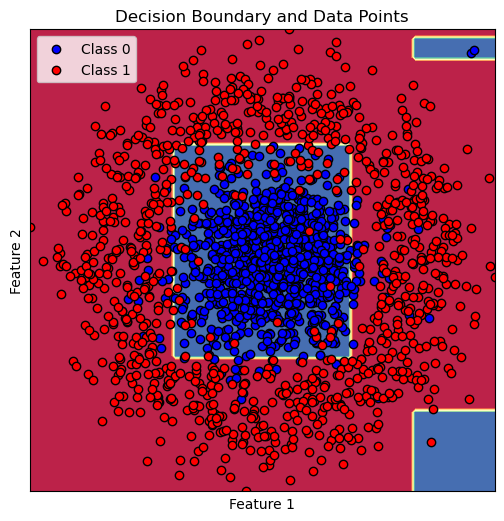

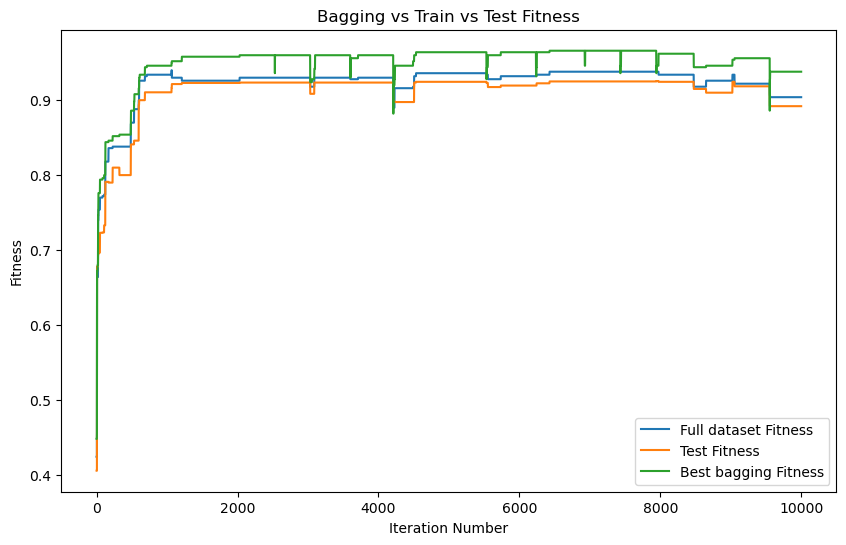

In [19]:
# Extract all solutions from the results
visualise_tree_decision(results["best_tree"], alt_dataset_dict)

all_solutions = results["all_solutions"]
all_best = results["all_fitnesses"]

# Calculate normal fitness and test fitness for each solution
normal_fitness_values = [fitness_normal(tree) for tree in all_solutions]
test_fitness_values = [fitness_test(tree) for tree in all_solutions]

# Plot the normal fitness against the test fitness
plt.figure(figsize=(10, 6))
plt.plot(normal_fitness_values, label="Full dataset Fitness")
plt.plot(test_fitness_values, label="Test Fitness")
plt.plot(all_best, label="Best bagging Fitness")
plt.xlabel("Iteration Number")
plt.ylabel("Fitness")
plt.title("Bagging vs Train vs Test Fitness")
plt.legend()
plt.show()

In [23]:
perturbation = lambda tree: combined_perturb(
    tree,
    feature_bounds=dataset_dict["feature_bounds"],
    prob_value=0.05,  # change value by a small step
    prob_add=0.06,  # expand leaf
    prob_prune=0.01,  # prune somewhere
)


fitness_fn = fitness_bagging


init_fn = lambda: Tree(
    feature_bounds=dataset_dict["feature_bounds"], generation_type="clever"
)

prob_crossover = 0.8
prob_mutation = 0.5
tournament_size = 25
population_size = 350

# do not change below:
max_evals = 10_000
trials = 50

fitness_list = []
alt_fitness_list = []
sizes = []
for trial in range(trials):

    results = evolutionary_algorithm(
        fitness_function=fitness_fn,
        perturb_fn=perturbation,
        init_fn=init_fn,
        max_evaluations=max_evals,
        crossover_fn=crossover_swap_random_subtrees,  # only one implemented
        prob_crossover=prob_crossover,
        prob_mutation=prob_mutation,
        tournament_size=tournament_size,
        population_size=population_size,
    )

    history = results["history"]
    all_solutions = [it["best_overall_individual"] for it in history]
    normal_fitness_values = [fitness_normal(tree) for tree in all_solutions]
    index = np.argmax(normal_fitness_values)
    best_tree = history[index]["best_overall_individual"]

    sizes.append(best_tree.size())
    fitness_list.append(fitness_normal(best_tree))
    alt_fitness_list.append(fitness_test(best_tree))


fitness_list = np.array(fitness_list)
sizes = np.array(sizes)

print("fitness: ")
print(np.mean(fitness_list), np.std(fitness_list))
print(fitness_list)

print("\n test fitness:")
print(np.mean(alt_fitness_list), np.std(alt_fitness_list))
print(alt_fitness_list)

print("\nsizes: ")
print(np.mean(sizes), np.std(sizes))
print(sizes)

fitness: 
0.9403199999999999 0.008230285535751449
[0.94  0.94  0.948 0.944 0.92  0.946 0.946 0.938 0.934 0.942 0.944 0.942
 0.954 0.954 0.948 0.95  0.938 0.942 0.932 0.938 0.946 0.934 0.926 0.944
 0.94  0.946 0.944 0.94  0.942 0.94  0.94  0.942 0.934 0.946 0.936 0.934
 0.95  0.938 0.936 0.948 0.942 0.94  0.944 0.95  0.942 0.928 0.932 0.908
 0.95  0.934]

 test fitness:
0.9141400000000001 0.008439810424411215
[0.909, 0.9065, 0.9135, 0.916, 0.931, 0.911, 0.9105, 0.929, 0.916, 0.9255, 0.9165, 0.924, 0.915, 0.9155, 0.9095, 0.9155, 0.9055, 0.912, 0.921, 0.92, 0.92, 0.893, 0.918, 0.9155, 0.9195, 0.9105, 0.9225, 0.9085, 0.921, 0.896, 0.9195, 0.916, 0.915, 0.923, 0.8925, 0.9265, 0.915, 0.91, 0.9085, 0.91, 0.9105, 0.912, 0.9215, 0.913, 0.9065, 0.8995, 0.906, 0.906, 0.927, 0.922]

sizes: 
47.08 26.463438929965246
[ 31  25  71  71  73  23  19  31  39  41 113  27  19  53  67  83  29  59
  19  61  13  23  87  51  37  97  51  27  49  71  43  75  27  19  61  39
  43 119  11  33  79  47  41  39  33  1

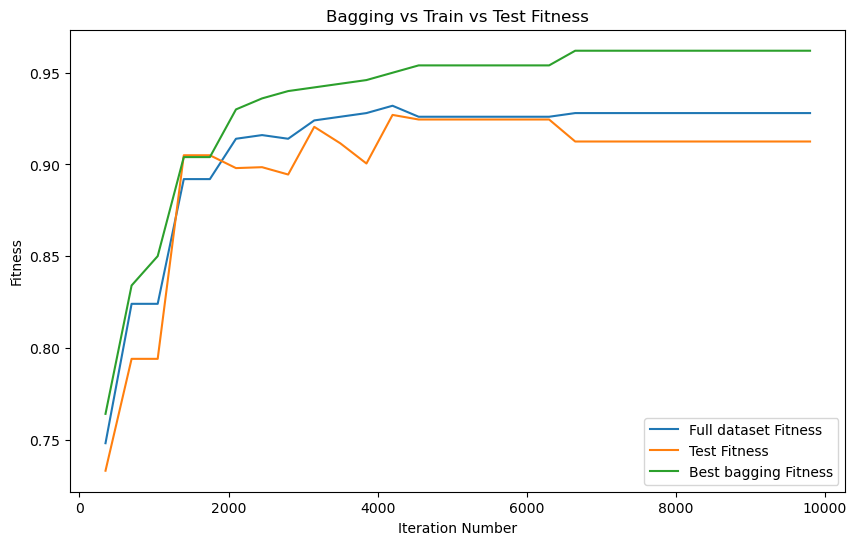

In [23]:
# Extract all solutions from the results
history = results["history"]
all_solutions = [it["best_overall_individual"] for it in history]
all_best = [it["best_overall_fitness"] for it in history]

# Calculate normal fitness and test fitness for each solution
normal_fitness_values = [fitness_normal(tree) for tree in all_solutions]
test_fitness_values = [fitness_test(tree) for tree in all_solutions]

# Plot the normal fitness against the test fitness
plt.figure(figsize=(10, 6))
x = population_size*(np.arange(len(normal_fitness_values))+1)
plt.plot(x,normal_fitness_values, label="Full dataset Fitness")
plt.plot(x,test_fitness_values, label="Test Fitness")
plt.plot(x,all_best, label="Best bagging Fitness")
plt.xlabel("Iteration Number")
plt.ylabel("Fitness")
plt.title("Bagging vs Train vs Test Fitness")
plt.legend()
plt.show()